***

Profesor: Gonzalo A. Ruz, PhD

Curso: Aprendizaje Automático

Curso basado en el libro Introduction to Machine Learning with Python by Andreas Mueller and Sarah Guido.

***

In [1]:
# Global imports and settings
%matplotlib inline

In [2]:
# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

# Clase 5: Aprendizaje Baysiano

# Teorema de Bayes
![](https://drive.google.com/uc?id=117Ndf3PF27hDUh_o0jLhY4bpr-z5A7Os)


![](https://drive.google.com/uc?id=1okCHe4KhJjsYWGVqGWxLVzYqwmKsxUD7)

### La regla de Bayes
Regla para actualizar la probabilidad de una hipótesis $c$ dado los datos $x$

![](https://drive.google.com/uc?id=1aqd88Cbj1Xje8sNV0YZMTgzIeYWzXt-v)

$P(c|x)$ es la probabilidad a posterior de la clase (objetivo) dado el predictor (atributo).  
$P(c)$ es la probabilidad _a priori_ de la clase: lo que creías antes de ver la evidencia $x$.  
$P(x|c)$ es la _verosimilitud_ de ver esa evidencia si la clase es correcta.  
$P(x)$ es la probabilidad  a priori del predictor (*verosimilitud marginal*): la probabilidad de la evidencia $x$ bajo cualquier circunstancia.

#### Ejemplo
*  A priori $P(exploded)$: el sol tiene una vida útil estimada de 10 mil millones de años, 
  $P(exploded) = \frac{1}{4.38 x 10^{13}}$
* Probabilidad de que el detector mienta: $P(lie)= \frac{1}{36}$

$$
\begin{aligned}
P(exploded|yes) &= \frac{P(yes|exploded)P(exploded)}{P(yes)} \\
 &= \frac{(1-P(lie)) P(exploded)}{P(exploded)(1-P(lie))+P(lie)(1-P(exploded))} \\
 &= \frac{1}{1.25226 x 10^{12}}
 \end{aligned}$$

### Modelos Bayesianos
* Son fácilmente actualizables con nuevos puntos de datos ('girando la manivela')
    * La probabilidad a posterior previa $P(c|x)$ pasa ha ser el nuevo a priori $P(c)$, luego aplicar la regla de Bayes en nuevos datos $x$
    * ej. recopilar nuevos datos del detector, actualizar probabilidades
* Aprenden la distribución conjunta $P(x,y)=P(x|y)P(y)$.
    * Ya sea continuo (primero) o discreto (segundo)  
    
![](https://drive.google.com/uc?id=1zfaLCX7mh2KugQCRoYljrynqM45dLWdl)

![](https://drive.google.com/uc?id=1h6azjpstKfX98YkW9iB8iyzsZngbhLD_)

### Los modelos Bayesianos son generativos
* La distribución conjunta representa los datos de entrenamiento para una clase en particular.
* Puede muestrear un _nuevo_ punto $\textbf{x}$ con alta predicción de verosimilitud $ P (x, c) $: ese nuevo punto será muy similar a los puntos de entrenamiento
* Por lo tanto, puede generar puntos nuevos (probables) de acuerdo con la misma distribución: _modelo generativo_
    * Puedes generar ejemplos que sean _falsos_ pero que estén muy cerca de los otros ejemplos de entrenamiento de la misma clase
    * También existen redes neuronales generativas (por ejemplo, GANs) que pueden hacer esto con mucha precisión para texto, imágenes, ...

![](https://drive.google.com/uc?id=1dOYBCicbKpUtXxt0iTgTuWdcwMqD5yfd)

### Clasificador naive Bayes

* Predecir la probabilidad de que un punto pertenezca a una determinada clase, utilizando el teorema de Bayes

$$P(c|\textbf{x}) = \frac{P(\textbf{x}|c)P(c)}{P(\textbf{x})}$$

* Problema: dado que $\textbf{x}$ es un vector, $P(\textbf{x}|c)$ puede ser muy complejo
* Asume ingenuamente que todas las características son condicionalmente independientes entre sí, en cuyo caso:  
$P(\mathbf{x}|c) = P(x_1|c) \times P(x_2|c) \times ... \times P(x_n|c)$
* Muy rápido: solo necesita extraer estadísticas de cada característica.
* Ver ejemplo en slides: Probabilistic modeling
  * cliente compra o no un computador?

### Sobre datos numéricos
* Necesitamos ajustar una distribución sobre los puntos de datos.
* GaussianNB: Calcula la media $\mu_c$ y la desviación estándar $\sigma_c$ de los valores de entidad por clase (rojo y azul):

    $p(x=v \mid c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }$

* Las predicciones se hacen usando el teorema de Bayes, calculando la probabilidad conjunta dadas todas las características y calculando la prob. posterior: $p(c \mid \mathbf{x}) = \frac{p(c) \ p(\mathbf{x} \mid c)}{p(\mathbf{x})}$

![](https://drive.google.com/uc?id=1IIDJqt85pE1oAlvxjjyqCQGxbH_aBHIZ)

In [4]:
#bloque para generar los plots de los clasificadores
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def plot_classifiers(names, classifiers, figuresize):
    h = .02  # step size in the mesh
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
    figure = plt.figure(figsize=figuresize)
    i = 1
    
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
        
    plt.tight_layout()
    plt.show()

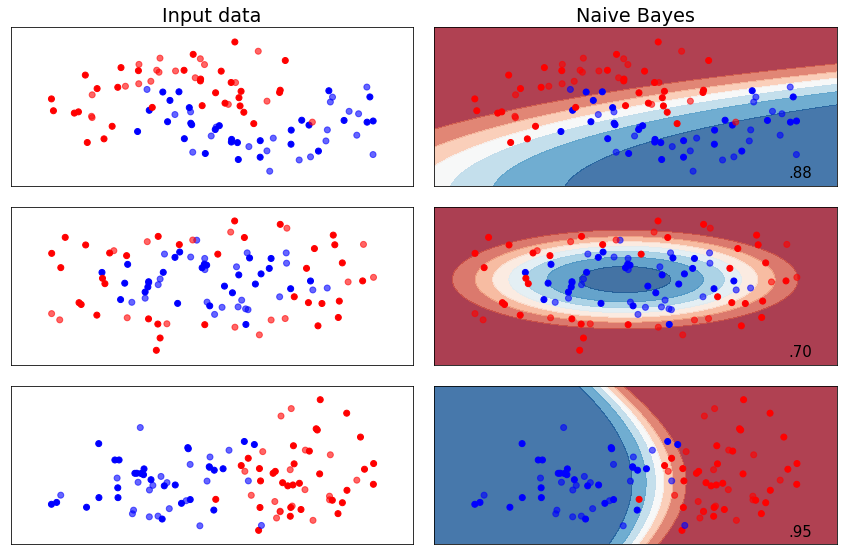

In [5]:
from sklearn.naive_bayes import GaussianNB

names = ["Naive Bayes"]
classifiers = [GaussianNB()]

plt.rcParams.update({'font.size': 16})
plot_classifiers(names, classifiers, figuresize=(12,8))

### Ejemplo usando breast cancer dataset

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

nb=GaussianNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        53
           1       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



Otros clasificadores naive Bayes:
    
* BernoulliNB
    * Asume datos binarios
    * Estadísticas de las características: número de entradas distintas de cero por clase
* MultinomialNB
    * Asume datos de recuento
    * Estadísticas de las características: Valor promedio por clase
    * Se usa principalmente para clasificación de texto (bag-of-words data)

### Bayesian Networks
* Una _Bayesian Network_ es un grafo acíclico dirigido representando variables como nodos y dependencias condicionales como arcos. 
* Si un arco $(A, B)$ conecta a las variables aleatorias A y B, entonces $P(B|A)$ es un factor en la distribución de probabilidad conjunta
    * Debemos saber $P(B|A)$ para todos los valores de $B$ y $A$
* La estructura del grafo se puede diseñar manualmente o aprender (difícil!)    
    
![](https://drive.google.com/uc?id=1sC_a07Q9QVyjhyv2K0SJqzik1CM6YynI)